In [1]:
!pip install pyspark

     |████████████████████████████████| 204.2MB 67kB/s 
     |████████████████████████████████| 204kB 50.9MB/s 
  Created wheel for pyspark: filename=pyspark-3.0.1-py2.py3-none-any.whl size=204612242 sha256=3886de2696d7ea0377d5bd1645df10fa586fb151a0d3333edc7395b1a66ea958
  Stored in directory: /root/.cache/pip/wheels/5e/bd/07/031766ca628adec8435bb40f0bd83bb676ce65ff4007f8e73f
Successfully built pyspark


In [2]:
# ต้องมี SparkContext ก่อนที่จะเริ่มใช้ Spark Functionality
from pyspark import SparkContext
sc = SparkContext()

# ใช้สำหรับ Spark DataFrame
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()


In [ ]:
### Loading data into Spark

# .parallelize() ใช้กับตัวเลข หรือ key value pairs
# .textFile() ใช้กับ unstructured data ที่มีตัวหนังสือเยอะๆ
# .collect() แสดงผลออกมาในรูปของ list
with open('README.md', 'w') as opened_file:
    opened_file.write('[![buildstatus](https://travis-ci.org/holdenk/learning-spark-examples.svg?branch=master)](https://travis-ci.org/holdenk/learning-spark-examples) Examples for Learning Spark =============== Examples for the Learning Spark book. These examples require a number of libraries and as such have long build files. We have also added a stand alone example with minimal dependencies and a small build file in the mini-complete-example directory. These examples have been updated to run against Spark 1.3 so they may be slightly different than the versions in your copy of "Learning Spark".Requirements == * JDK 1.7 or higher * Scala 2.10.3 - scala-lang.org * Spark 1.3* Protobuf compiler- On debian you can install with sudo apt-get install protobuf-compiler* R & the CRAN package Imap are required for the ChapterSixExample* The Python examples require urllib3 Python examples === From spark just run ./bin/pyspark ./src/python/[example] Spark Submit')

rdd1 = sc.parallelize([1, 2, 3, 4, 5])
rdd2 = sc.parallelize(range(1,11))
rdd3 = sc.parallelize("Fuck you cocksucker")
rdd4 = sc.parallelize([1, 2, 3, 4, 5], numSlices = 6)
rdd5 = sc.textFile("README.md")
rdd6 = sc.textFile("README.md", minPartitions=6)

print(rdd1.collect())
print(rdd2.collect())
print(rdd3.collect())
print(rdd.take(1))
print(rdd1.getNumPartitions())
print(rdd4.getNumPartitions())
print(rdd5.getNumPartitions())
print(rdd6.getNumPartitions())

[1, 2, 3, 4, 5]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
['F', 'u', 'c', 'k', ' ', 'y', 'o', 'u', ' ', 'c', 'o', 'c', 'k', 's', 'u', 'c', 'k', 'e', 'r']
['[![buildstatus](https://travis-ci.org/holdenk/learning-spark-examples.svg?branch=master)](https://travis-ci.org/holdenk/learning-spark-examples) Examples for Learning Spark =============== Examples for the Learning Spark book. These examples require a number of libraries and as such have long build files. We have also added a stand alone example with minimal dependencies and a small build file in the mini-complete-example directory. These examples have been updated to run against Spark 1.3 so they may be slightly different than the versions in your copy of "Learning Spark".Requirements == * JDK 1.7 or higher * Scala 2.10.3 - scala-lang.org * Spark 1.3* Protobuf compiler- On debian you can install with sudo apt-get install protobuf-compiler* R & the CRAN package Imap are required for the ChapterSixExample* The Python examples require urllib3 P

In [ ]:
### RDD Transformation ###

# .map() Transformation
print(".map() Transformation")
print(sc.parallelize([1,2,3,4]).collect())
print(sc.parallelize([1,2,3,4]).map(lambda x: 3*x).collect(), "\n")

# .filter() Transformation
print(".filter() Transformation")
print(sc.parallelize(range(0, 101)).collect())
print(sc.parallelize(range(0, 101)).filter(lambda x: x%20==0).collect(), "\n")

# .flatmap() Transformation
print(".flatmap() Transformation")
print(sc.parallelize(["Fuck you cocksucker", "Shit, damn cunt"]).collect())
print(sc.parallelize(["Fuck you cocksucker", "Shit, damn cunt"]).map(lambda s: s.split(" ")).collect())
print(sc.parallelize(["Fuck you cocksucker", "Shit, damn cunt"]).flatMap(lambda s: s.split(" ")).collect())

# .union() Transformation
print(".union() Transformation")
print(sc.parallelize([1,2,3,4]).union(sc.parallelize([5, 6, 7, 8])).collect())


.map() Transformation
[1, 2, 3, 4]
[3, 6, 9, 12] 

.filter() Transformation
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]
[0, 20, 40, 60, 80, 100] 

.flatmap() Transformation
['Fuck you cocksucker', 'Shit, damn cunt']
[['Fuck', 'you', 'cocksucker'], ['Shit,', 'damn', 'cunt']]
['Fuck', 'you', 'cocksucker', 'Shit,', 'damn', 'cunt']
.union() Transformation
[1, 2, 3, 4, 5, 6, 7, 8]


In [ ]:
### RDD Actions ###
RDD = sc.parallelize([1,2,3,4,5])
print(RDD.collect())
print(RDD.take(3))
print(RDD.first())
print(RDD.count())

# Reduce
print(RDD.reduce(lambda x, y: x+y))

# saveAsTextFile
RDD.saveAsTextFile("array1")
RDD.coalesce(1).saveAsTextFile("array2")


[1, 2, 3, 4, 5]
[1, 2, 3]
1
5
15


In [ ]:
### Creating Pair RDD

# Method 1
print(sc.parallelize([("Arm", 3), ("Pook", 2), ("Arm", 4), ("Mon", 3)]).collect())

# Method 2
print(sc.parallelize(["Arm 3", "Pook 2", "Arm 4", "Mon 3"]).map(lambda s: (s.split()[0], s.split()[1])).collect())


[('Arm', 3), ('Pook', 2), ('Arm', 4), ('Mon', 3)]
[('Arm', '3'), ('Pook', '2'), ('Arm', '4'), ('Mon', '3')]


In [ ]:
### Transformations of pair RDD ###
RDD = sc.parallelize([("Arm", 3), ("Pook", 2), ("Arm", 4), ("Mon", 3)])

# reduceByKey
print(RDD.reduceByKey(lambda x, y: x-y).collect())
print(RDD.reduceByKey(lambda x, y: x*y).collect(), "\n")

# sortByKey
print(RDD.sortByKey().collect())
print(RDD.sortByKey(ascending=False).collect())
print(RDD.map(lambda x: (x[1], x[0])).sortByKey().collect())
print(RDD.sortByKey(ascending=False).collect(), "\n")

# groupByKey
print(RDD.groupByKey().collect()) #Does not present the term
for i, j in RDD.groupByKey().collect():
  print(i, list(j))
print("\n")

# join
RDD2 = sc.parallelize([("Arm", 55), ("Pook", 23), ("Fuck", 24)])
print(RDD.join(RDD2).collect())

[('Pook', 2), ('Arm', -1), ('Mon', 3)]
[('Pook', 2), ('Arm', 12), ('Mon', 3)] 

[('Arm', 3), ('Arm', 4), ('Mon', 3), ('Pook', 2)]
[('Pook', 2), ('Mon', 3), ('Arm', 3), ('Arm', 4)]
[(2, 'Pook'), (3, 'Arm'), (3, 'Mon'), (4, 'Arm')]
[('Pook', 2), ('Mon', 3), ('Arm', 3), ('Arm', 4)] 

[('Pook', <pyspark.resultiterable.ResultIterable object at 0x7fe58a0b86d8>), ('Arm', <pyspark.resultiterable.ResultIterable object at 0x7fe58a0b8eb8>), ('Mon', <pyspark.resultiterable.ResultIterable object at 0x7fe58a0b8a20>)]
Pook [2]
Arm [3, 4]
Mon [3]


[('Pook', (2, 23)), ('Arm', (3, 55)), ('Arm', (4, 55))]


In [ ]:
### Actions of Pair RDD ###

# countByKey
RDD = sc.parallelize([("Arm", 3), ("Pook", 2), ("Arm", 4), ("Mon", 3), ("Arm", 999)])
print(RDD.countByKey()) # count the number of occurences by key

# collectAsMap
print(RDD.collectAsMap())  # return only the latest key-value pairs

defaultdict(<class 'int'>, {'Arm': 3, 'Pook': 1, 'Mon': 1})
{'Arm': 999, 'Pook': 2, 'Mon': 3}


In [ ]:
### Count most often words ###

stop_words = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 'can', 'will', 'just', 'don', 'should', 'now']
RDD = sc.textFile("Complete_Shakespeare.txt").flatMap(lambda s: s.split())
print(RDD.take(5))
RDD_no_stop = RDD.filter(lambda s: s.lower() not in stop_words)
pair_RDD = RDD_no_stop.map(lambda w: (w, 1))
print(pair_RDD.take(5))
result = pair_RDD.reduceByKey(lambda x, y: x+y)
print(result.take(5))
result.map(lambda x: (x[1], x[0])).sortByKey(ascending=False).take(10) # สลับเอาจำนวนครั้งของคำขึ้นนำหน้าเพื่อเรียงลำดับ



['The', 'Project', 'Gutenberg', 'EBook', 'of']
[('Project', 1), ('Gutenberg', 1), ('EBook', 1), ('Complete', 1), ('Works', 1)]
[('Project', 9), ('EBook', 1), ('Shakespeare', 12), ('use', 38), ('anyone', 1)]


[(650, 'thou'),
 (574, 'thy'),
 (393, 'shall'),
 (311, 'would'),
 (295, 'good'),
 (286, 'thee'),
 (273, 'love'),
 (269, 'Enter'),
 (254, "th'"),
 (225, 'make')]

In [ ]:
### Create DataFrame ###
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

# From RDD
RDD = sc.parallelize([("XS", 2018, 5.65, 2.79, 6.24),("XR", 2018, 5.94, 2.98, 6.84),("X10", 2017, 5.65, 2.79, 6.13),("8Plus", 2017, 6.23, 3.07, 7.12)])
names = ['Model', 'Year', 'Height', 'Width', 'Weight']
sdf = spark.createDataFrame(RDD, schema=names)
print(sdf.show())

RDD = sc.parallelize([('Mona',20), ('Jennifer',34),('John',20), ('Jim',26)])
sdf = spark.createDataFrame(RDD, schema=["Name", "Age"])
print(sdf.show())

# From csv
sdf_csv = spark.read.csv("people.csv", header=True,inferSchema=True)
print(sdf_csv.show())

+-----+----+------+-----+------+
|Model|Year|Height|Width|Weight|
+-----+----+------+-----+------+
|   XS|2018|  5.65| 2.79|  6.24|
|   XR|2018|  5.94| 2.98|  6.84|
|  X10|2017|  5.65| 2.79|  6.13|
|8Plus|2017|  6.23| 3.07|  7.12|
+-----+----+------+-----+------+

None
+--------+---+
|    Name|Age|
+--------+---+
|    Mona| 20|
|Jennifer| 34|
|    John| 20|
|     Jim| 26|
+--------+---+

None
+---+---------+-----------------+------+-------------+
|_c0|person_id|             name|   sex|date of birth|
+---+---------+-----------------+------+-------------+
|  0|      100|   Penelope Lewis|female|   1990-08-31|
|  1|      101|    David Anthony|  male|   1971-10-14|
|  2|      102|        Ida Shipp|female|   1962-05-24|
|  3|      103|     Joanna Moore|female|   2017-03-10|
|  4|      104|   Lisandra Ortiz|female|   2020-08-05|
|  5|      105|    David Simmons|  male|   1999-12-30|
|  6|      106|    Edward Hudson|  male|   1983-05-09|
|  7|      107|     Albert Jones|  male|   1990-09-13|

In [ ]:
### Dataframe transformation ###

RDD = sc.parallelize([('Mona',20), ('Jennifer',34),('John',20), ('Jim',26), ('Jim',26), ('John',20), ('John',25)])
sdf = spark.createDataFrame(RDD, schema=["Name", "Age"])
sdf_csv = spark.read.csv("people.csv", header=True,inferSchema=True)
# .select("col_name")
print(sdf_csv.select("name").show(2))
print(sdf_csv.select("sex", "person_id").show(2))

# .filter()
print(sdf.filter("Age < 30").show()) # filter ด้วย sql query
print(sdf.filter(sdf["Age"] < 30).show()) # ใช้ sdf.Age ก็ได้ filter ด้วย booleean array

#. groupBy()
print(sdf_csv.groupby("sex").count().show())
print(sdf_csv.groupBy("sex").count().show())

# .orderBy()
print(sdf.orderBy("Age").show())
print(sdf.orderBy("Age", ascending=False).show())

# .dropDuplicates()
print(sdf.show())
print(sdf.dropDuplicates().show())

# .withColumnRenamed()
print(sdf_csv.withColumnRenamed("_c0", "index").show(3))

# .printSchema()
print(sdf_csv.printSchema())
print(sdf.printSchema())

# .describe()
print(sdf_csv.describe().show())
print(sdf.describe().show())

# .columns ไม่มีวงเล็บ -- แสดงชื่อคอลัมน์
display(sdf_csv.columns)

+--------------+
|          name|
+--------------+
|Penelope Lewis|
| David Anthony|
+--------------+
only showing top 2 rows

None
+------+---------+
|   sex|person_id|
+------+---------+
|female|      100|
|  male|      101|
+------+---------+
only showing top 2 rows

None
+----+---+
|Name|Age|
+----+---+
|Mona| 20|
|John| 20|
| Jim| 26|
| Jim| 26|
|John| 20|
|John| 25|
+----+---+

None
+----+---+
|Name|Age|
+----+---+
|Mona| 20|
|John| 20|
| Jim| 26|
| Jim| 26|
|John| 20|
|John| 25|
+----+---+

None
+------+-----+
|   sex|count|
+------+-----+
|  null| 1920|
|female|49014|
|  male|49066|
+------+-----+

None
+------+-----+
|   sex|count|
+------+-----+
|  null| 1920|
|female|49014|
|  male|49066|
+------+-----+

None
+--------+---+
|    Name|Age|
+--------+---+
|    John| 20|
|    John| 20|
|    Mona| 20|
|    John| 25|
|     Jim| 26|
|     Jim| 26|
|Jennifer| 34|
+--------+---+

None
+--------+---+
|    Name|Age|
+--------+---+
|Jennifer| 34|
|     Jim| 26|
|     Jim| 26|
|    John

['_c0', 'person_id', 'name', 'sex', 'date of birth']

In [ ]:
### Using SQL ### ต้อง register ตารางลงใน catalog ก่อน
RDD = sc.parallelize([("XS", 2018, 5.65, 2.79, 6.24),("XR", 2018, 5.94, 2.98, 6.84),("X10", 2017, 5.65, 2.79, 6.13),("8Plus", 2017, 6.23, 3.07, 7.12)])
names = ['Model', 'Year', 'Height', 'Width', 'Weight']
sdf = spark.createDataFrame(RDD, schema=names)

sdf.createOrReplaceTempView('iphones')
sdf_csv.createOrReplaceTempView("people")

# ตรวจสอบว่ามีตารางอะไรใน แคตตาล็อกบ้าง SparkSession ทำหน้าที่เหมือนเป็น Database
print(spark.catalog.listTables())

# ใช้ SQL queries
spark.sql("SELECT Year, AVG(Height) FROM iphones GROUP BY Year").show()

print("Using spark.sql")
spark.sql("SELECT Year, Model FROM iphones WHERE Year < 2018").show()
print("Using spark dataframe .filter")
sdf.select("Year", "Model").filter("Year < 2018").show()

spark.sql("SELECT sex, MAX(person_id) FROM people GROUP BY sex").show()
spark.sql("SELECT person_id, name FROM people WHERE person_id = 101").show()
spark.sql("SELECT person_id, name FROM people WHERE person_id = 101 OR person_id = 103").show()
spark.sql("SELECT sex, name FROM people WHERE sex = 'female'").show(4)

[Table(name='iphones', database=None, description=None, tableType='TEMPORARY', isTemporary=True), Table(name='people', database=None, description=None, tableType='TEMPORARY', isTemporary=True)]
+----+-----------+
|Year|avg(Height)|
+----+-----------+
|2018|      5.795|
|2017|       5.94|
+----+-----------+

Using spark.sql
+----+-----+
|Year|Model|
+----+-----+
|2017|  X10|
|2017|8Plus|
+----+-----+

Using spark dataframe .filter
+----+-----+
|Year|Model|
+----+-----+
|2017|  X10|
|2017|8Plus|
+----+-----+

+------+--------------+
|   sex|max(person_id)|
+------+--------------+
|  null|        100009|
|female|        100098|
|  male|        100099|
+------+--------------+

+---------+-------------+
|person_id|         name|
+---------+-------------+
|      101|David Anthony|
+---------+-------------+

+---------+-------------+
|person_id|         name|
+---------+-------------+
|      101|David Anthony|
|      103| Joanna Moore|
+---------+-------------+

+------+--------------+
|   se

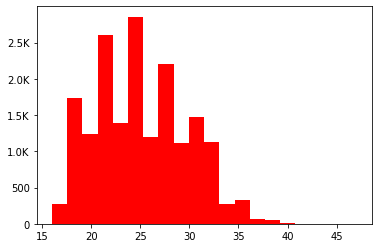

In [ ]:
## Visualizations using pyspark_dist_explore  

import matplotlib.pyplot as plt
# from pyspark import SparkContext
# from pyspark.sql import SparkSession
# sc = SparkContext()
# spark = SparkSession.builder.getOrCreate()
# !pip install handyspark
from pyspark_dist_explore import hist, distplot, pandas_histogram
test_df = spark.read.csv("Fifa2018.csv", header=True, inferSchema=True)
fig, ax = plt.subplots()
test_df_age = test_df.select("Age")
hist(ax, test_df_age, bins=20, color="red")
plt.show()


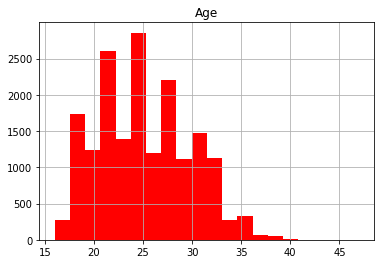

In [ ]:
## Visualizations using .toPandas()

import matplotlib.pyplot as plt
test_df = spark.read.csv("Fifa2018.csv", header=True, inferSchema=True)
test_df_pandas = test_df.toPandas()
test_df_pandas.hist("Age", bins=20, color="red")
plt.show()

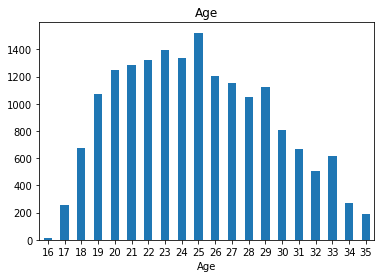

In [ ]:
## Visualizations using Handy Spark
import handyspark
import matplotlib.pyplot as plt

test_df = spark.read.csv("Fifa2018.csv", header=True, inferSchema=True)
fig, ax = plt.subplots()
hdf = test_df.toHandy()
hdf.cols["Age"].hist(bins=20, ax=ax)

plt.show()


In [ ]:
## ML With PySpark

from pyspark.mllib.recommendation import ALS, Rating
from pyspark.mllib.classification import LogisticRegressionWithLBFGS
from pyspark.mllib.clustering import KMeans

In [ ]:
### Collaborative Filtering ###

### Rating function
r = Rating(user=1, product=2, rating=5.0)
display((r[0], r[1], r[2]))
display(r)

(1, 2, 5.0)

Rating(user=1, product=2, rating=5.0)

In [ ]:
### Splitting train, test data using .randomSplit ###

train, test = sc.parallelize(range(1, 11)).randomSplit([0.6, 0.4])
print(train.collect(), test.collect())


[1, 2, 3, 4, 5, 7, 8] [6, 9, 10]


In [ ]:
### Alternating Least Squares (ALS)

r1 = Rating(1, 1, 1.0)
r2 = Rating(1, 2, 2.0)
r3 = Rating(2, 1, 2.0)
ratings = sc.parallelize([r1, r2, r3])
print(ratings.collect())

# Train data
# rank คือจำนวน features คืออะไรหว่า ?
model = ALS.train(ratings, rank=10, iterations=10)

# .predictAll()
# test_RDD คือ tuples of user_id และ product_id
test_RDD = sc.parallelize([(1, 2), (1, 1), (2, 1), (2, 2)])
display(model.predictAll(test_RDD).collect())
for r in model.predictAll(test_RDD).collect():
    print(f'User{r[0]} has predicted rating for product {r[1]} = {r[2]}')

[Rating(user=1, product=1, rating=1.0), Rating(user=1, product=2, rating=2.0), Rating(user=2, product=1, rating=2.0)]


[Rating(user=2, product=2, rating=0.8549055859367425),
 Rating(user=2, product=1, rating=1.9953338331218717),
 Rating(user=1, product=2, rating=1.9890383014300776),
 Rating(user=1, product=1, rating=1.0000194126028232)]

User2 has predicted rating for product 2 = 0.8549055859367425
User2 has predicted rating for product 1 = 1.9953338331218717
User1 has predicted rating for product 2 = 1.9890383014300776
User1 has predicted rating for product 1 = 1.0000194126028232


In [ ]:
# ใช้ map ทำให้เป็น tuples เสียก่อน โดย x[0] = user, x[1] = product, x[2] = rating
rates = ratings.map(lambda x: ((x[0], x[1]), x[2]))
preds = model.predictAll(test_RDD).map(lambda x: ((x[0], x[1]), x[2]))

# join เพื่อให้ตัวที่ซ้ำกันใน rates และ preds อยู่รวมกัน 
rates_preds = rates.join(preds)

# ทำความเข้าใจกับ rates_preds.collect() ดีๆ
# มัน join เฉพาะคู่ลำดับที่ซ้ำ ซึ่ง (2, 2) ใน test_RDD มันไม่มีซ้ำ เลยหายไป
# x[0] คือ คู่ลำดับของ (user, product) 
# x[1] คือ คู่ลำดับของ (คะแนนจริง, คะแนนพยากรณ์)
display(rates_preds.collect())
display(rates_preds.map(lambda x: (x[1][0]-x[1][1])).collect())
a = rates_preds.map(lambda x: (x[1][0]-x[1][1])).collect()
(a[0]**2+a[1]**2+a[2]**2)/3

[((1, 1), (1.0, 1.0000194126028232)),
 ((1, 2), (2.0, 1.9890383014300776)),
 ((2, 1), (2.0, 1.9953338331218717))]

[-1.9412602823232206e-05, 0.010961698569922351, 0.004666166878128264]

4.731077524050913e-05

In [ ]:
### MSE ###
rates = ratings.map(lambda x: ((x[0], x[1]), x[2]))
preds = model.predictAll(test_RDD).map(lambda x: ((x[0], x[1]), x[2]))

# join เพื่อให้ตัวที่ซ้ำกันใน rates และ preds อยู่รวมกัน 
rates_preds = rates.join(preds)
MSE = rates_preds.map(lambda x: (x[1][0]-x[1][1])**2).mean()


print(ratings.collect())
print(rates.collect())
print(preds.collect())
print(rates_preds.collect())
print(f'MSE1 = {MSE}')  

[Rating(user=1, product=1, rating=1.0), Rating(user=1, product=2, rating=2.0), Rating(user=2, product=1, rating=2.0)]
[((1, 1), 1.0), ((1, 2), 2.0), ((2, 1), 2.0)]
[((2, 2), 0.8549055859367425), ((2, 1), 1.9953338331218717), ((1, 2), 1.9890383014300776), ((1, 1), 1.0000194126028232)]
[((1, 1), (1.0, 1.0000194126028232)), ((1, 2), (2.0, 1.9890383014300776)), ((2, 1), (2.0, 1.9953338331218717))]
MSE1 = 4.731077524050913e-05


In [ ]:
### Building Recommendation
from pyspark.mllib.recommendation import ALS, Rating
# Load the data into RDD
data = sc.textFile("ratings.csv")
print(f'data is type {type(data)}')
display(data.take(5))

# Split the RDD 
print("data.map(lambda l: l.split(','))")
ratings = data.map(lambda l: l.split(','))
display(ratings.take(5))

# Transform the ratings RDD 
ratings_final = ratings.map(lambda line: Rating(int(line[0]), int(line[1]), float(line[2])))
display(ratings_final.take(5))

# Split the data into training and test
training_data, test_data = ratings_final.randomSplit([0.8, 0.2])

# Create the ALS model on the training data สรุป rank คืออะไร ก็ยังไม่รู้
model = ALS.train(training_data, rank=10, iterations=10)

# Drop the ratings column ในที่นี้ test_data เป็น RDD จึงใช้ method drop แบบ spark.dataframe ไม่ได้
testdata_no_rating = test_data.map(lambda p: (p[0], p[1]))

# Predict the model  
predictions = model.predictAll(testdata_no_rating)

# Prepare ratings data
rates = ratings_final.map(lambda r: ((r[0], r[1]), r[2]))

# Prepare predictions data
preds = predictions.map(lambda r: ((r[0], r[1]), r[2]))

# Join the ratings data with predictions data
rates_and_preds = rates.join(preds)

# Calculate and print MSE
MSE = rates_and_preds.map(lambda r: (r[1][0] - r[1][1])**2).mean()
print("Mean Squared Error of the model for the test data = {:.2f}".format(MSE))

data is type <class 'pyspark.rdd.RDD'>


['1,31,2.5,1260759144',
 '1,1029,3.0,1260759179',
 '1,1061,3.0,1260759182',
 '1,1129,2.0,1260759185',
 '1,1172,4.0,1260759205']

data.map(lambda l: l.split(','))


[['1', '31', '2.5', '1260759144'],
 ['1', '1029', '3.0', '1260759179'],
 ['1', '1061', '3.0', '1260759182'],
 ['1', '1129', '2.0', '1260759185'],
 ['1', '1172', '4.0', '1260759205']]

[Rating(user=1, product=31, rating=2.5),
 Rating(user=1, product=1029, rating=3.0),
 Rating(user=1, product=1061, rating=3.0),
 Rating(user=1, product=1129, rating=2.0),
 Rating(user=1, product=1172, rating=4.0)]

Mean Squared Error of the model for the test data = 1.33


In [ ]:
### Logistic Regression ###
from numpy import arange
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml import Pipeline
from pyspark.sql import SparkSession
from pyspark.sql.types import IntegerType
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

spark = SparkSession.builder.getOrCreate()

# Load data
flights = spark.read.csv('flights_small.csv', header=True, inferSchema=True)
planes = spark.read.csv('planes.csv', header=True, inferSchema=True)
print('FLIGHT DATA')
display(flights.show(3))
print("PLANES DATA")
display(planes.show(3))

# Rename year column เพราะว่า year ใน planes_data เป็นปีที่ผลิต 
planes = planes.withColumnRenamed("year", "plane_year")
print("CHANGE TO PLANE YEAR PLANES DATA")
display(planes.show(3))

# Join the DataFrames
model_data = flights.join(planes, on="tailnum", how="leftouter")

# เปลี่ยนค่าให้เป็นจำนวนเต็ม
model_data = model_data.withColumn("arr_delay", model_data["arr_delay"].cast("integer"))
model_data = model_data.withColumn("air_time", model_data["air_time"].cast("integer"))
model_data = model_data.withColumn("month", model_data["month"].cast("integer"))
model_data = model_data.withColumn("plane_year", model_data["plane_year"].cast("integer"))

# Create binary identification
model_data = model_data.withColumn("is_late", model_data["arr_delay"] > 0)
# Convert to an integer 
### คำว่า label สำคัญมาก!!!!!! this is the default name for the response variable in Spark's machine learning routines
model_data = model_data.withColumn("label", model_data["is_late"].cast("integer"))
# Remove missing values
model_data = model_data.filter("arr_delay is not NULL and dep_delay is not NULL and air_time is not NULL and plane_year is not NULL")

# เพิ่มคอลัมน์ อายุเครื่องบิน
model_data = model_data.withColumn("plane_age", model_data["year"]-model_data["plane_year"]) 
display(model_data.show(3))

# ก่อนอื่นต้องทำการแปรค่าของ Categorical variables ให้เป็น One Hot Vector ก่อน
# Create a StringIndexer
carr_indexer = StringIndexer(inputCol="carrier", outputCol="carrier_index")
dest_indexer = StringIndexer(inputCol="dest", outputCol="dest_index")

# Create a OneHotEncoder สังเกตว่า index จะมาเป็น input ของ OneHotEncoder
carr_encoder = OneHotEncoder(inputCol="carrier_index", outputCol="carrier_fact")
dest_encoder = OneHotEncoder(inputCol="dest_index", outputCol="dest_fact")

# Make a VectorAssembler ต้องมีในการรวมค่าiuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuu7777777
vec_assembler = VectorAssembler(inputCols=["month", "air_time", "carrier_fact", "dest_fact", "plane_age"],outputCol="features" )

# Make the pipeline
flights_pipe = Pipeline(stages=[dest_indexer, dest_encoder, carr_indexer, carr_encoder, vec_assembler])

# Create the DataFrame piped_data by calling the Pipeline methods .fit() and .transform()
piped_data = flights_pipe.fit(model_data).transform(model_data)
print("PIPED_DATA_AFTER_TRANSFORMATION_USING_ONEHOTENCODER -- SEE HOW NEW COLUMNS dest_index, dest_fact, carrier_index, carrier_fact, and features are added")
display(piped_data.show(5))

# Make sure to split data after OneHotEncoder transformation
training, test = piped_data.randomSplit([0.6, 0.4])

# Create a LogisticRegression called lr by calling LogisticRegression() with no arguments.
lr = LogisticRegression()
evaluator = BinaryClassificationEvaluator(metricName="areaUnderROC")

# Looking for optimal hyperparameters
grid = ParamGridBuilder()
grid = grid.addGrid(lr.regParam, arange(0, 0.1, 0.01))
grid = grid.addGrid(lr.elasticNetParam, [0, 1])
grid = grid.build()

# Make the validator for cross validation (แบ่งตัวอย่างออกเป็นกลุ่มย่อยทำการพยากรณ์กันระหว่างกลุ่ม)
cv = CrossValidator(estimator=lr, estimatorParamMaps=grid, evaluator=evaluator)

# Fit cross validation models
models = cv.fit(training)

# Extract the best model
best_lr = models.bestModel
best_lr2 = lr.fit(training)

# Evluate the model
# Use the model to predict the test set
test_results = best_lr.transform(test)
test_results2 = best_lr2.transform(test)

# Evaluate the predictions
print(evaluator.evaluate(test_results))
print(evaluator.evaluate(test_results2))

# Show prediction
display(test_results.select("is_late", "label", "prediction", "probability").show(6))

# Cross-check with the evaluator results
t = test_results.withColumn("Correct", test_results["label"]==test_results["prediction"])
t = t.withColumn("Correct", t["Correct"].cast("Integer"))
t = t.select("label","Correct")
correct = t.rdd.map(lambda x: (1,x[1])).reduceByKey(lambda x,y: x + y).collect()[0][1]
print(correct/test_results.count())

FLIGHT DATA
+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+----+--------+--------+----+------+
|year|month|day|dep_time|dep_delay|arr_time|arr_delay|carrier|tailnum|flight|origin|dest|air_time|distance|hour|minute|
+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+----+--------+--------+----+------+
|2014|   12|  8|     658|       -7|     935|       -5|     VX| N846VA|  1780|   SEA| LAX|     132|     954|   6|    58|
|2014|    1| 22|    1040|        5|    1505|        5|     AS| N559AS|   851|   SEA| HNL|     360|    2677|  10|    40|
|2014|    3|  9|    1443|       -2|    1652|        2|     VX| N847VA|   755|   SEA| SFO|     111|     679|  14|    43|
+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+----+--------+--------+----+------+
only showing top 3 rows



None

PLANES DATA
+-------+----+--------------------+----------------+--------+-------+-----+-----+---------+
|tailnum|year|                type|    manufacturer|   model|engines|seats|speed|   engine|
+-------+----+--------------------+----------------+--------+-------+-----+-----+---------+
| N102UW|1998|Fixed wing multi ...|AIRBUS INDUSTRIE|A320-214|      2|  182|   NA|Turbo-fan|
| N103US|1999|Fixed wing multi ...|AIRBUS INDUSTRIE|A320-214|      2|  182|   NA|Turbo-fan|
| N104UW|1999|Fixed wing multi ...|AIRBUS INDUSTRIE|A320-214|      2|  182|   NA|Turbo-fan|
+-------+----+--------------------+----------------+--------+-------+-----+-----+---------+
only showing top 3 rows



None

CHANGE TO PLANE YEAR PLANES DATA
+-------+----------+--------------------+----------------+--------+-------+-----+-----+---------+
|tailnum|plane_year|                type|    manufacturer|   model|engines|seats|speed|   engine|
+-------+----------+--------------------+----------------+--------+-------+-----+-----+---------+
| N102UW|      1998|Fixed wing multi ...|AIRBUS INDUSTRIE|A320-214|      2|  182|   NA|Turbo-fan|
| N103US|      1999|Fixed wing multi ...|AIRBUS INDUSTRIE|A320-214|      2|  182|   NA|Turbo-fan|
| N104UW|      1999|Fixed wing multi ...|AIRBUS INDUSTRIE|A320-214|      2|  182|   NA|Turbo-fan|
+-------+----------+--------------------+----------------+--------+-------+-----+-----+---------+
only showing top 3 rows



None

+-------+----+-----+---+--------+---------+--------+---------+-------+------+------+----+--------+--------+----+------+----------+--------------------+------------+--------+-------+-----+-----+---------+-------+-----+---------+
|tailnum|year|month|day|dep_time|dep_delay|arr_time|arr_delay|carrier|flight|origin|dest|air_time|distance|hour|minute|plane_year|                type|manufacturer|   model|engines|seats|speed|   engine|is_late|label|plane_age|
+-------+----+-----+---+--------+---------+--------+---------+-------+------+------+----+--------+--------+----+------+----------+--------------------+------------+--------+-------+-----+-----+---------+-------+-----+---------+
| N846VA|2014|   12|  8|     658|       -7|     935|       -5|     VX|  1780|   SEA| LAX|     132|     954|   6|    58|      2011|Fixed wing multi ...|      AIRBUS|A320-214|      2|  182|   NA|Turbo-fan|  false|    0|        3|
| N559AS|2014|    1| 22|    1040|        5|    1505|        5|     AS|   851|   SEA| HNL

None

PIPED_DATA_AFTER_TRANSFORMATION_USING_ONEHOTENCODER -- SEE HOW NEW COLUMNS dest_index, dest_fact, carrier_index, carrier_fact, and features are added
+-------+----+-----+---+--------+---------+--------+---------+-------+------+------+----+--------+--------+----+------+----------+--------------------+------------+--------+-------+-----+-----+---------+-------+-----+---------+----------+---------------+-------------+--------------+--------------------+
|tailnum|year|month|day|dep_time|dep_delay|arr_time|arr_delay|carrier|flight|origin|dest|air_time|distance|hour|minute|plane_year|                type|manufacturer|   model|engines|seats|speed|   engine|is_late|label|plane_age|dest_index|      dest_fact|carrier_index|  carrier_fact|            features|
+-------+----+-----+---+--------+---------+--------+---------+-------+------+------+----+--------+--------+----+------+----------+--------------------+------------+--------+-------+-----+-----+---------+-------+-----+---------+----------+--

None

0.6906980037511995
0.6906980037511995
+-------+-----+----------+--------------------+
|is_late|label|prediction|         probability|
+-------+-----+----------+--------------------+
|  false|    0|       0.0|[0.52861261866773...|
|  false|    0|       0.0|[0.57858761434370...|
|   true|    1|       1.0|[0.35397660343458...|
|  false|    0|       1.0|[0.49199657443205...|
|   true|    1|       1.0|[0.37066969021019...|
|  false|    0|       0.0|[0.61621551222800...|
+-------+-----+----------+--------------------+
only showing top 6 rows



None

0.6824161073825503


In [ ]:
### Classification ###
from pyspark.mllib.linalg import Vectors
from pyspark.mllib.regression import LabeledPoint
from pyspark.mllib.feature import HashingTF
from pyspark.mllib.classification import LogisticRegressionWithLBFGS

denseVec = Vectors.dense([1.0, 2.0, 3.0])
sparseVec = Vectors.sparse(4, {1: 1.0, 3: 5.5})
positive = LabeledPoint(1.0, [1.0, 0.0, 3.0])
negative = LabeledPoint(0.0, [2.0, 1.0, 1.0])
data = [positive, negative]
RDD = sc.parallelize(data)
lrm = LogisticRegressionWithLBFGS.train(RDD)

print(f'denseVec = {denseVec}')
print(f'sparseVec = {sparseVec}, \n')
print(f'positive labeled point = {positive}')
print(f'negative labeled point = {negative}, \n')


# Hashing TF หลักการเดียวกันกับ OneHotEncoder ทำ SparseVector ออกมา
words = "Fuck you asshole".split()
words2 = "hello hello hello hello world".split()
tf = HashingTF(10000)
print(f'words = {words}')
print(f'words2 = {words2}, \n')
print(f'tf.transform(words) = ')
display(tf.transform(words)); print("\n")
print(f'tf.transform(words2) = ')
display(tf.transform(words2)); print("\n")

print(f'RDD = '); display(RDD.collect())
print(lrm.predict([1.0, 0.0, 1.0]))
print(lrm.predict([2.0, 0.0, 1.0]))

denseVec = [1.0,2.0,3.0]
sparseVec = (4,[1,3],[1.0,5.5]), 

positive labeled point = (1.0,[1.0,0.0,3.0])
negative labeled point = (0.0,[2.0,1.0,1.0]), 

words = ['Fuck', 'you', 'asshole']
words2 = ['hello', 'hello', 'hello', 'hello', 'world'], 

tf.transform(words) = 


SparseVector(10000, {2385: 1.0, 4785: 1.0, 8257: 1.0})



tf.transform(words2) = 


SparseVector(10000, {5007: 4.0, 6680: 1.0})



RDD = 


[LabeledPoint(1.0, [1.0,0.0,3.0]), LabeledPoint(0.0, [2.0,1.0,1.0])]

1
0


In [ ]:
### email spam classifier
# Load the datasets into RDDs
spam_rdd = sc.textFile("spam.txt")
non_spam_rdd = sc.textFile("ham.txt")

# Split the email messages into words
spam_words = spam_rdd.flatMap(lambda email: email.split(' ')) # ถ้าใช้ map จะไม่แตกคำ มันจะแตกคำอยู่ใน list of list 
non_spam_words = non_spam_rdd.flatMap(lambda email: email.split(' '))

# ตรวจสอบความเข้าใจของ map กับ flatMap ดูจำนวน elements ที่แตกออกมา
print(f"spam_rdd.count() = {spam_rdd.count()}")
print(f"spam_rdd.map().count() = {spam_rdd.map(lambda email: email.split(' ')).count()}")
print(f"spam_rdd.map().count() = {spam_rdd.flatMap(lambda email: email.split(' ')).count()}")


# Print the first element in the split RDD
print("The first element in spam_words is", spam_words.first())
print("The first element in non_spam_words is", non_spam_words.first(), "\n")

# Create a HashingTf instance with 200 features
tf = HashingTF(numFeatures=200)

# Map each word to one feature
spam_features = tf.transform(spam_words)
non_spam_features = tf.transform(non_spam_words)

# Label the features: 1 for spam, 0 for non-spam
spam_samples = spam_features.map(lambda features:LabeledPoint(1, features))
non_spam_samples = non_spam_features.map(lambda features:LabeledPoint(0, features))

# Combine the two datasets
samples = spam_samples.union(non_spam_samples); print("\n")
print(f"samples has been mapped into LabeledPoint Object: ")
display(samples.take(5)); print("\n")
print("samples.map(lambda x: x.features) = ")
display(samples.map(lambda x: x.features).take(5)); print("\n")
print("samples.map(lambda x: x.label) = ")
display(samples.map(lambda x: x.label).take(5)); print("\n")

# Split the data into training and testing
train_samples,test_samples = samples.randomSplit([0.8, 0.2])

# Train the model
model = LogisticRegressionWithLBFGS.train(train_samples)

# Create a prediction label from the test data
predictions = model.predict(test_samples.map(lambda x: x.features)) # LabeledPoint object มี features, label attributes
print("\n")
display()
# Combine original labels with the predicted labels
labels_and_preds = test_samples.map(lambda x: x.label).zip(predictions); print("\n")
display

# Check the accuracy of the model on the test data
accuracy = labels_and_preds.filter(lambda x: x[0] == x[1]).count() / float(test_samples.count())
print("Model accuracy : {:.2f}".format(accuracy))


spam_rdd.count() = 747
spam_rdd.map().count() = 747
spam_rdd.map().count() = 17893
The first element in spam_words is You
The first element in non_spam_words is Rofl. 



samples has been mapped into LabeledPoint Object: 


[LabeledPoint(1.0, (200,[103,111,119],[1.0,1.0,1.0])),
 LabeledPoint(1.0, (200,[14,89,193,199],[1.0,1.0,1.0,1.0])),
 LabeledPoint(1.0, (200,[82],[1.0])),
 LabeledPoint(1.0, (200,[83,149,193],[1.0,1.0,1.0])),
 LabeledPoint(1.0, (200,[1,64,89,162,168,193],[1.0,2.0,1.0,1.0,1.0,2.0]))]

samples.map(lambda x: x.features) = 


[SparseVector(200, {103: 1.0, 111: 1.0, 119: 1.0}),
 SparseVector(200, {14: 1.0, 89: 1.0, 193: 1.0, 199: 1.0}),
 SparseVector(200, {82: 1.0}),
 SparseVector(200, {83: 1.0, 149: 1.0, 193: 1.0}),
 SparseVector(200, {1: 1.0, 64: 2.0, 89: 1.0, 162: 1.0, 168: 1.0, 193: 2.0})]



samples.map(lambda x: x.label) = 


[1.0, 1.0, 1.0, 1.0, 1.0]



Model accuracy : 0.82


In [21]:
cluster_center

,col1,col2
0,13.666196,2.435870
1,12.288605,2.292326


Wine Data RDD


[[14.23, 2.43], [13.2, 2.14], [13.16, 2.67], [14.37, 2.5], [13.24, 2.87]]



Find cluster centers


[array([12.28860465,  2.29232558]), array([13.66619565,  2.43586957])]



Within Set Sum of Squared Error = 77.72166220943333 

spark df represents data points: 


,col1,col2
0,14.23,2.43
1,13.20,2.14
2,13.16,2.67
3,14.37,2.50
4,13.24,2.87




cluster center is just a dataframe of centers


,col1,col2
0,12.288605,2.292326
1,13.666196,2.435870


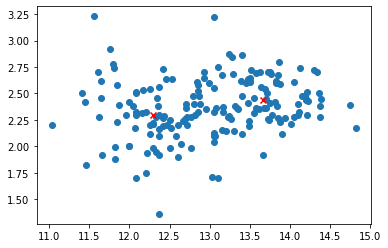

In [22]:
### Clustering ###
import pandas as pd
from pyspark.mllib.clustering import KMeans
import matplotlib.pyplot as plt

# สังเกตว่าใช้ข้อมูลคนชุดเดียวกันแต่คนละแหล่ง จึงเปลี่ยนจาก x[0] เป็น x[2] และ x[2] เป็น x[4]
RDD = sc.textFile("WineData.csv").map(lambda x: x.split(",")).map(lambda x: [float(x[2]), float(x[4])])

print("Wine Data RDD")
display(RDD.take(5)); print("\n")
model = KMeans.train(RDD, k=2, maxIterations=10) # k คือ Number of clusters to create
print("Find cluster centers")
display(model.clusterCenters); print("\n")

# Define function to compute MSE
from math import sqrt
def error(point):    
  center = model.centers[model.predict(point)] # model.centers คือคู่ลำดับของ cluster ส่วน model.predict(point) คือการพยากรณ์ว่า point นั้นๆ จะอยู่ในกลุ่มไหน ในที่นี้มีสองกลุ่ม คือ กลุ่มที่ 0 และ 1
  return sqrt(sum([x**2for x in (point - center)])) # Euclidean distance

WSSSE = RDD.map(lambda point: error(point)).reduce(lambda x, y: x + y)
# sum(RDD.map(lambda point: error(point)).collect()) ก็คือผลของ .reduce ด้านบน
print("Within Set Sum of Squared Error = " + str(WSSSE), "\n")

# Create visualization
sdf = spark.createDataFrame(RDD, schema=["col1", "col2"])
print("spark df represents data points: ")
pdf = sdf.toPandas()
display(pdf.head()); print("\n")
cluster_center = pd.DataFrame(model.clusterCenters, columns=["col1", "col2"])
print("cluster center is just a dataframe of centers")
display(cluster_center); print("\n")
plt.scatter(pdf["col1"], pdf["col2"])
plt.scatter(cluster_center["col1"], cluster_center["col2"], color="red", marker="x")
plt.show()


The raw RDD file looks like this:


['664159\t550946', '665845\t557965', '597173\t575538']



The split RDD looks like this:


[['664159', '550946'], ['665845', '557965'], ['597173', '575538']]



The integer RDD looks like this:


[[664159, 550946], [665845, 557965], [597173, 575538]]



There are 5000 rows in the rdd_split_int dataset
The cluster 13 has Within Set Sum of Squared Error 252060331.1260039
The cluster 14 has Within Set Sum of Squared Error 215808893.2796594
The cluster 15 has Within Set Sum of Squared Error 169394691.52639425
The cluster 16 has Within Set Sum of Squared Error 168103213.0429197


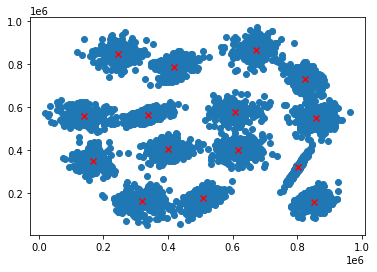

In [23]:
### clustering example

# Load the dataset into a RDD
clusterRDD = sc.textFile("5000_points.txt")
print("The raw RDD file looks like this:")
display(clusterRDD.take(3)); print("\n")

# Split the RDD based on tab
rdd_split = clusterRDD.map(lambda x: x.split("\t"))
print("The split RDD looks like this:")
display(rdd_split.take(3)); print("\n")

# Transform the split RDD by creating a list of integers
rdd_split_int = rdd_split.map(lambda x: [int(x[0]), int(x[1])])
print("The integer RDD looks like this:")
display(rdd_split_int.take(3)); print("\n")

# Count the number of rows in RDD 
print("There are {} rows in the rdd_split_int dataset".format(rdd_split_int.count()))

### the best practice is to try several values of k until the average intracluster distance stops decreasing dramatically ###
### For real world data, you should train the model with a wide range of K values.

# Train the model with clusters from 13 to 16 and compute WSSSE 
for clst in range(13, 17):
    model = KMeans.train(rdd_split_int, clst, seed=1)
    WSSSE = rdd_split_int.map(lambda point: error(point)).reduce(lambda x, y: x + y)
    print("The cluster {} has Within Set Sum of Squared Error {}".format(clst, WSSSE))

# Train the model again with the best k 
model = KMeans.train(rdd_split_int, k=15, seed=1)

# Get cluster centers
cluster_centers = model.clusterCenters

# Convert rdd_split_int RDD into Spark DataFrame
rdd_split_int_df = spark.createDataFrame(rdd_split_int, schema=["col1", "col2"])

# Convert Spark DataFrame into Pandas DataFrame
rdd_split_int_df_pandas = rdd_split_int_df.toPandas()

# Convert "cluster_centers" that you generated earlier into Pandas DataFrame
cluster_centers_pandas = pd.DataFrame(cluster_centers, columns=["col1", "col2"])

# Create an overlaid scatter plot
plt.scatter(rdd_split_int_df_pandas["col1"], rdd_split_int_df_pandas["col2"])
plt.scatter(cluster_centers_pandas["col1"], cluster_centers_pandas["col2"], color="red", marker="x")
plt.show()
